In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
data = pd.read_excel('Reg_Multi.xlsx')

In [11]:
data.head()

,mois,Quantités vendues,dépense publicité papier,dépense publicité internet
0,1,73959,7685.9,7575.9
1,2,71544,7384.4,7744.4
2,3,78587,8258.7,8028.7
3,4,80364,8536.4,8726.4
4,5,78771,8337.1,8217.1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mois                        24 non-null     int64  
 1   Quantités vendues           24 non-null     int64  
 2   dépense publicité papier    24 non-null     float64
 3   dépense publicité internet  24 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 900.0 bytes


In [13]:
data.describe()

,mois,Quantités vendues,dépense publicité papier,dépense publicité internet
count,24.000000,24.000000,24.000000,24.000000
mean,12.500000,74258.291667,7737.079167,7807.495833
std,7.071068,3164.394612,351.670869,386.930701
min,1.000000,69003.000000,7130.300000,7040.300000
25%,6.750000,71959.500000,7598.200000,7569.375000
50%,12.500000,74103.000000,7700.100000,7868.650000
75%,18.250000,76354.500000,7897.425000,8007.550000
max,24.000000,80364.000000,8536.400000,8726.400000


In [14]:
data.tail()

,mois,Quantités vendues,dépense publicité papier,dépense publicité internet
19,20,76200,7750.0,8310.0
20,21,69701,7140.1,7120.1
21,22,77005,8110.5,8000.5
22,23,70987,7488.7,7328.7
23,24,75643,7784.3,7914.3


In [37]:
X = data[['dépense publicité papier','dépense publicité internet']]

In [38]:
X

,dépense publicité papier,dépense publicité internet
0,7685.9,7575.9
1,7384.4,7744.4
2,8258.7,8028.7
3,8536.4,8726.4
4,8337.1,8217.1
5,7638.6,7598.6
6,7868.5,7668.5
7,7804.5,7934.5
8,8015.9,7915.9
9,7488.0,7868.0


In [39]:
y = data['Quantités vendues']

In [40]:
y

0     73959
1     71544
2     78587
3     80364
4     78771
5     71986
6     74885
7     73345
8     76659
9     71880
10    73598
11    74893
12    69003
13    78542
14    72543
15    74247
16    76253
17    72582
18    69022
19    76200
20    69701
21    77005
22    70987
23    75643
Name: Quantités vendues, dtype: int64

Text(0.5, 1.0, 'Nuage de point dépense publicité papier Vs Quantités vendues')

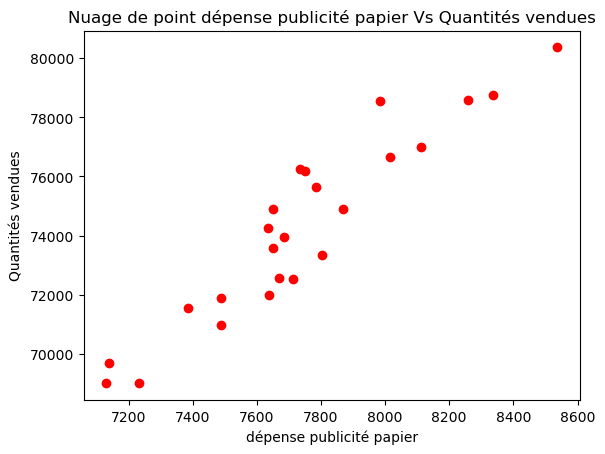

In [46]:
plt.scatter(data['dépense publicité papier'],y, color='r')
plt.xlabel('dépense publicité papier')
plt.ylabel('Quantités vendues')
plt.title('Nuage de point dépense publicité papier Vs Quantités vendues')

Text(0.5, 1.0, 'Nuage de point dépense publicité internet Vs Quantités vendues')

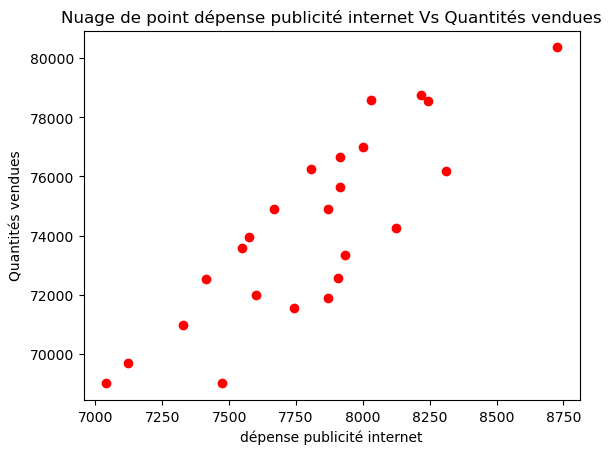

In [47]:
plt.scatter(data['dépense publicité internet'],y, color='r')
plt.xlabel('dépense publicité internet')
plt.ylabel('Quantités vendues')
plt.title('Nuage de point dépense publicité internet Vs Quantités vendues')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

In [52]:
ml = LinearRegression()

In [53]:
ml.fit(X_train, y_train)

LinearRegression()

In [55]:
print('Regression coefficient: ',ml.coef_)
print('Constant: ',ml.intercept_)

Regression coefficient:  [7.26358904 1.34525436]
Constant:  7362.462190923034


In [57]:
y_predict = ml.predict(X_test)

In [60]:
ml.predict([[20000 , 35000]])

C:\Users\lenovo\Nouveau dossier\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([199718.14555278])

In [61]:
print('MAE:',mean_absolute_error(y_test,y_predict))
print('MSE:',mean_squared_error(y_test,y_predict))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_predict)))
print('R²:',r2_score(y_test,y_predict))

MAE: 945.4831440846428
MSE: 1207445.5364055526
RMSE: 1098.838266718789
R²: 0.8317616448873939


Text(0.5, 1.0, 'Nuage de point dépense publicité internet Vs Quantités vendues')

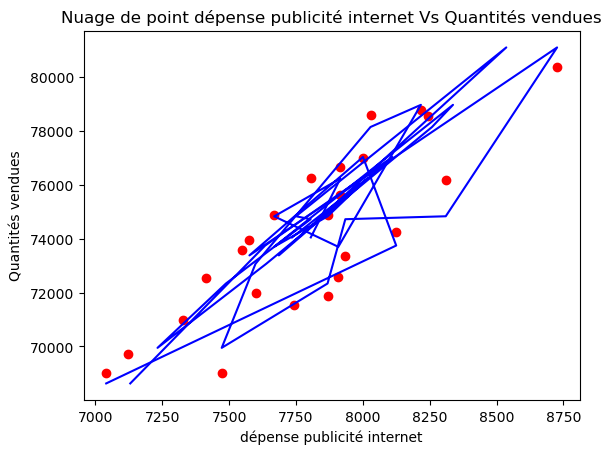

In [62]:
plt.scatter(data['dépense publicité internet'],y, color='r')
plt.plot(X_train,ml.predict(X_train), color='b')
plt.xlabel('dépense publicité internet')
plt.ylabel('Quantités vendues')
plt.title('Nuage de point dépense publicité internet Vs Quantités vendues')